##Análisis Temperatura de Controladores de baterías y baterías

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
cd Datos/

/home/rodrigo/dataTritiumWS22/Datos


In [3]:
dia4 = pd.read_csv('BMSlog_2014-11-17_09-10-57.csv')

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (5,6,7,8,9,10,11,12,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
dia4 = dia4.convert_objects(convert_numeric=True)

A continuación se muestran los nombres de las columnas

In [5]:
dia4.columns

Index([u'Log time', u' Min mV', u' Max mV', u' Min �C', u' Max �C', u' Pack mV', u' Pack mA', u' SOC(Ah)', u' SOC(%)', u' BAL(Ah)', u' BAL(%)', u' Fan 1(rpm)', u' Fan 2(rpm)', u' Flags', u' Prech Stat', u' 12614_T0', u' 12637_T0', u' 12610_T0', u' 12396_T0', u' 12414_T0', u' 12418_T0', u' 12614_T1', u' 12637_T1', u' 12610_T1', u' 12396_T1', u' 12414_T1', u' 12418_T1', u' 12614_V0', u' 12614_V1', u' 12614_V2', u' 12614_V3', u' 12614_V4', u' 12614_V5', u' 12614_V6', u' 12614_V7', u' 12637_V0', u' 12637_V1', u' 12637_V2', u' 12637_V3', u' 12637_V4', u' 12637_V5', u' 12637_V6', u' 12637_V7', u' 12610_V0', u' 12610_V1', u' 12610_V2', u' 12610_V3', u' 12610_V4', u' 12610_V5', u' 12610_V6', u' 12610_V7', u' 12396_V0', u' 12396_V1', u' 12396_V2', u' 12396_V3', u' 12396_V4', u' 12396_V5', u' 12396_V6', u' 12396_V7', u' 12414_V0', u' 12414_V1', u' 12414_V2', u' 12414_V3', u' 12414_V4', u' 12414_V5', u' 12414_V6', u' 12414_V7', u' 12418_V0', u' 12418_V1', u' 12418_V2', u' 12418_V3', u' 12418_V4',

La caja de baterías pequeña, es la que va desde el voltaje 0V hasta 62.9V nominal y posee un arreglo de 17 packs en serie.
A continuación se muestran las temperaturas de los controladores dentro de la caja. (colocar diagrama)

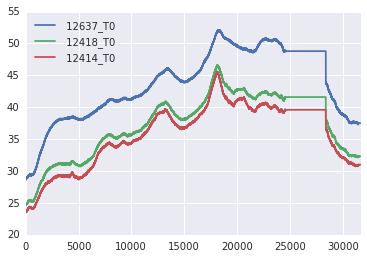

In [8]:
dia4[[' 12637_T0',' 12418_T0',' 12414_T0']].plot()

* Se observa que existen datos perdidos aproximadamente entre el dato 24000 y el dato 27000 (corroborar con más detalle)
* El controlador 12637 se calienta mucho más que los otros dos, ese controlador se encuentra encima de las últimas líneas del pack, cerca del borne y además el ventilador se ubica al otro extremo de la caja
* Se produce una variación típica entre los controladores, es decir siguen el mismo patrón y la temperatura aumenta a medida que se descargan las baterías.
* Que sigan un mismo patron puede implicar que la temperatura es notablemente diferente sólo por las condiciones de ventilación diferentes.

A continuación se grafican las temperaturas de los termistores que están distribuidos dentro de la caja y que representan la temperatura de las baterías

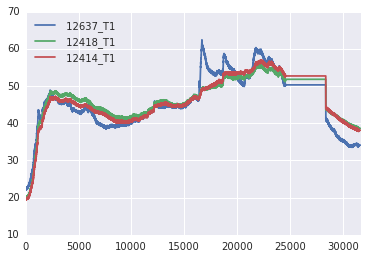

In [9]:
dia4[[' 12637_T1',' 12418_T1',' 12414_T1']].plot()

* La temperatura de las baterías en esta caja se mantiene bastante uniforme, excepto en dos intervalos, que la temperatura del sector derecho, cerca del borne positivo del pack, aumenta drásticamente.

La caja de baterías grande, posee un arreglo de 21 baterías en serie, y tres controladores de baterías, cada uno monitorizando 7 packs paralelos. A continuación se muestran las temperaturas de esta caja:

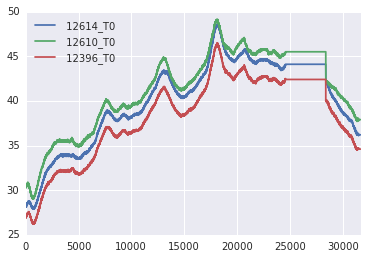

In [10]:
dia4[[' 12614_T0',' 12610_T0',' 12396_T0']].plot()

* En esta caja la disposición es similar, el ventilador está ubicado en un extremo y al otro están en alineados los 3 controladores, el controlador 12396 está más cerca del ventilador, y mantiene una temperatura menor.
* Según la posición alejada del controlador 12614 se podría presuponer que sería el con más temperatura de la caja, sin embargo fue el otro, ubicado entremedio.
* Se observa un patron similar en todas las temperaturas, por lo que podemos suponer que ventilando mejor se lograría bajar la temperatura de estos a un nivel aceptable, independiente del estado de ecualización de las baterías. (Se debe corroborar después analizando otras variables)

A continuación se grafica los valores de los sensores colocados entremedio del pack de baterías de la caja 2:

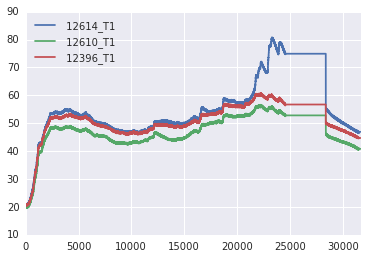

In [16]:
dia4[[' 12614_T1',' 12610_T1',' 12396_T1']].plot()

* Se puede observar que la temperatura de las baterías se mantiene estables, sin embargo, a llega un punto en que el nivel de carga del arreglo de 7 en serie del extremo cercano al borne, se calienta drásticamente (teoría es que el voltaje de las baterías bajó mucho durante ese intervalo, aumentando la temperatura y disminuyendo la resistencia progresivamente.
* Esto no pasó con el resto de baterías.

A continuación se calculan los promedios de temperatura de los controladores de la primera caja

In [14]:
dia4[[' 12637_T0',' 12418_T0',' 12414_T0']].mean()

 12637_T0    43.577406
 12418_T0    37.302617
 12414_T0    35.722139
dtype: float64

Y aquí se calcula el promedio de temperatura de los controladores de la segunda caja

In [15]:
dia4[[' 12614_T0',' 12610_T0',' 12396_T0']].mean()

 12614_T0    40.016306
 12610_T0    41.263464
 12396_T0    38.199574
dtype: float64

* La temperatura de los controladores se mantuvo relativamente baja, y el hecho que un controlador promedie 35ºC puede significar que basta con una buena ventilación por flujo de aire o ventilador extractor para mantenerlo en una temperatura segura, y que podría permitir exigir más el pack completo.

Aquí calcularemos el promedio de temperatura de las baterías

In [17]:
dia4[[' 12637_T1',' 12418_T1',' 12414_T1']].mean()

 12637_T1    45.767271
 12418_T1    46.402579
 12414_T1    46.227035
dtype: float64

In [18]:
dia4[[' 12614_T1',' 12610_T1',' 12396_T1']].mean()

 12614_T1    55.51981
 12610_T1    47.16549
 12396_T1    50.91910
dtype: float64

* La caja dos promedio temperaturas más altas, lo que puede asociarse a mayor superficie y mayor cantidad de baterías generadoras de calor, 4 pack serie de 8 baterías en paralelo, es decir 32 baterías más que la caja 1.

A continuación se calcularán lo máximos absolutos de la caja 1 en controladores:

In [19]:
dia4[[' 12637_T0',' 12418_T0',' 12414_T0']].max()

 12637_T0    52.1
 12418_T0    46.6
 12414_T0    45.6
dtype: float64

y en controladores de la caja 2:

In [20]:
dia4[[' 12614_T0',' 12610_T0',' 12396_T0']].max()

 12614_T0    48.6
 12610_T0    49.1
 12396_T0    46.5
dtype: float64

* El máximo absoluto de los controladores fue 52º C

Ahora calcularemos el máximo absoluto en las baterías en la caja 1:

In [21]:
dia4[[' 12637_T1',' 12418_T1',' 12414_T1']].max()

 12637_T1    62.4
 12418_T1    55.8
 12414_T1    57.0
dtype: float64

In [22]:
dia4[[' 12614_T1',' 12610_T1',' 12396_T1']].max()

 12614_T1    80.7
 12610_T1    56.6
 12396_T1    60.9
dtype: float64

* Se observa que el máximo de temperatura fue de 80ºC, lo que es una temperatura peligrosa, debido a que el rango de temperatura nominal en descarga es entre 20º y 60ºC, lo que se corrobora con el gráfico, debido que al pasar esa temperatura límite del rango recomendado, empezó a calentarse drásticamente ese sector del pack.

**Resumen en gráficos**
* Controladores

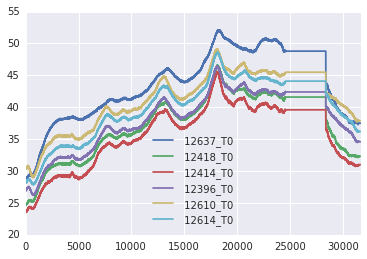

In [23]:
dia4[[' 12637_T0',' 12418_T0',' 12414_T0',' 12396_T0',' 12610_T0', ' 12614_T0']].plot()

* Baterías

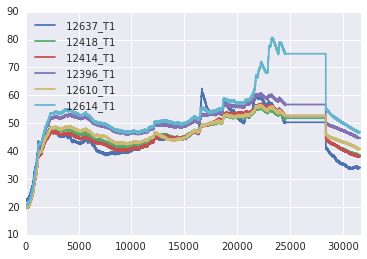

In [24]:
dia4[[' 12637_T1',' 12418_T1',' 12414_T1',' 12396_T1',' 12610_T1', ' 12614_T1']].plot()